In [19]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, ward

In [2]:
people = fetch_lfw_people(min_faces_per_person=20, resize = 0.7)
print("people keys : {}".format(people.keys()))
print("target name : {}".format(people["target_names"]))

people keys : dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
target name : ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rud

In [3]:
# pca
mask = np.zeros(people["target"].shape, dtype = "bool")
image_shape = people["images"][0].shape
for target in np.unique(people["target"]):
    mask[np.where(people["target"] == target)[0][:50]]= 1
X_people = people["data"][mask]
y_people = people["target"][mask]
X_people /= 255

In [7]:
# DBSCAN
pca = PCA(n_components = 100, whiten = True, random_state = 0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps = {}".format(eps))
    dbscan = DBSCAN(eps = eps, min_samples = 3)
    labels = dbscan.fit_predict(X_pca)
    print("Clusters present: {}".format(np.unique(labels)))
    print("CLuster sizes: {}".format(np.bincount(labels + 1)))



eps = 1
Clusters present: [-1]
CLuster sizes: [2063]

eps = 3
Clusters present: [-1]
CLuster sizes: [2063]

eps = 5
Clusters present: [-1]
CLuster sizes: [2063]

eps = 7
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
CLuster sizes: [2003    4   14    7    4    3    3    4    4    3    3    5    3    3]

eps = 9
Clusters present: [-1  0  1  2]
CLuster sizes: [1306  751    3    3]

eps = 11
Clusters present: [-1  0]
CLuster sizes: [ 413 1650]

eps = 13
Clusters present: [-1  0]
CLuster sizes: [ 120 1943]


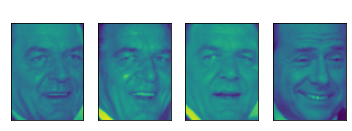

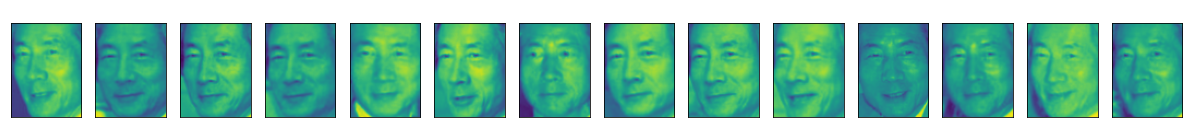

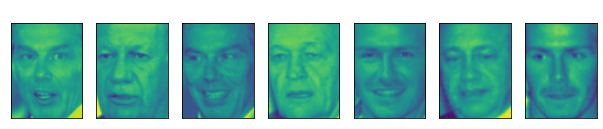

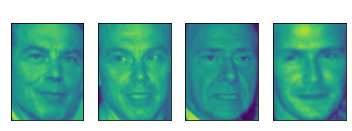

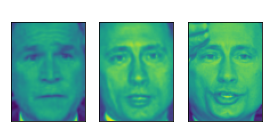

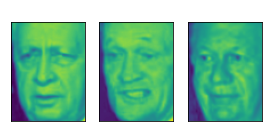

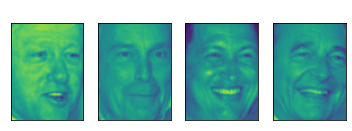

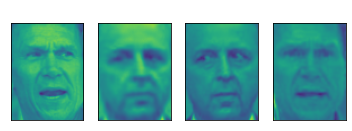

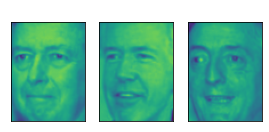

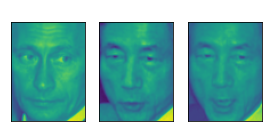

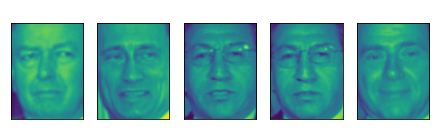

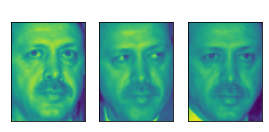

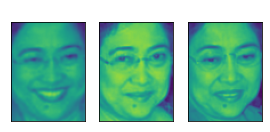

In [9]:
dbscan = DBSCAN(min_samples = 3, eps = 7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    
    fig, axes = plt.subplots(1, n_images, figsize = (n_images * 1.5, 4), subplot_kw = {'xticks': (), 'yticks': ()})
    
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)
        ax.set_title(people.target_names[label].split()[-1], color = "white")

In [12]:
# k-means

km = KMeans(n_clusters = 10, random_state = 0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [113 256 188 147 216 180 258 211 139 355]


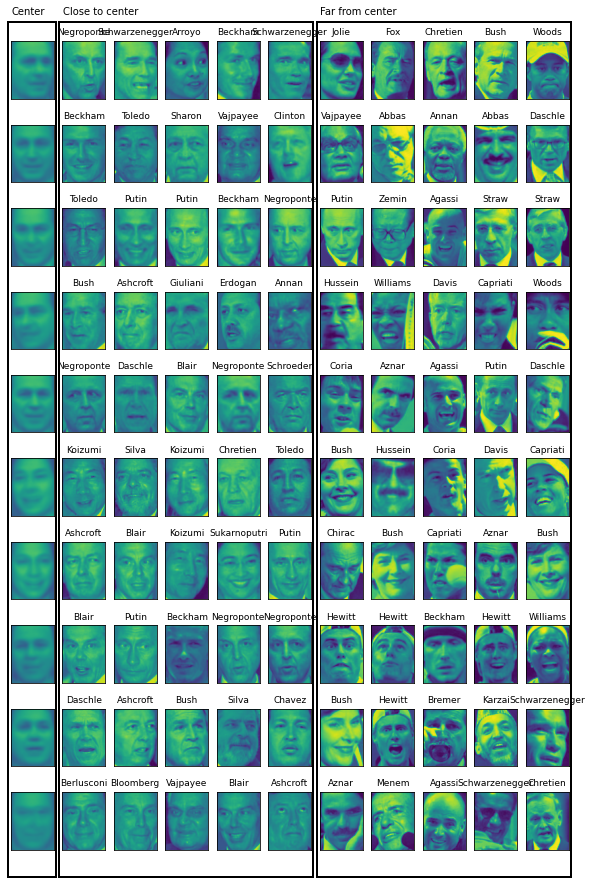

In [16]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people["target_names"])

In [17]:
# agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters = 10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
print("ARI : {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

Cluster sizes agglomerative clustering: [478 254 317 119  96 191 424  17  55 112]
ARI : 0.07


Text(0, 0.5, 'Cluster distances')

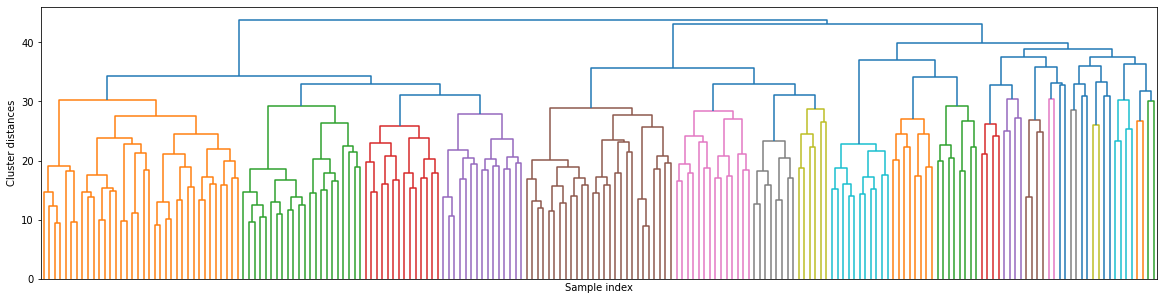

In [21]:
linkage_array = ward(X_pca)
plt.figure(figsize = (20, 5))
dendrogram(linkage_array, p = 7, truncate_mode = 'level', no_labels = True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distances")

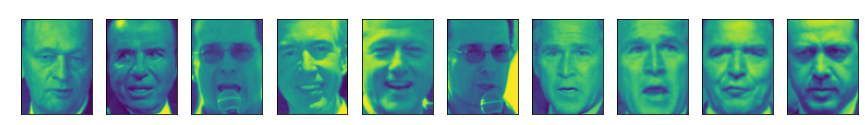

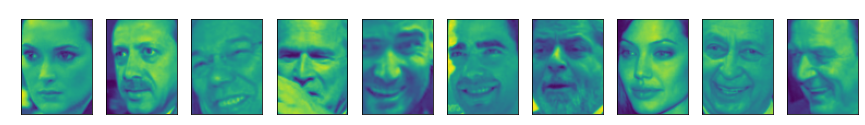

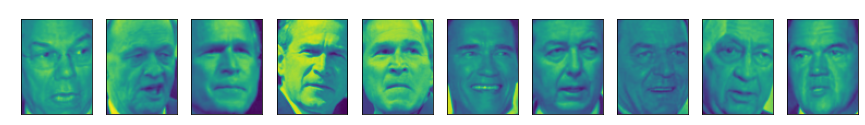

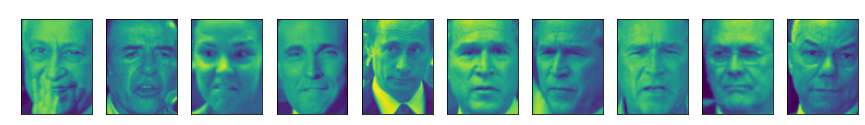

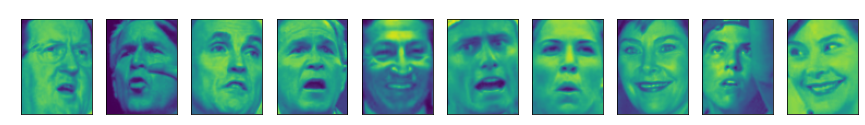

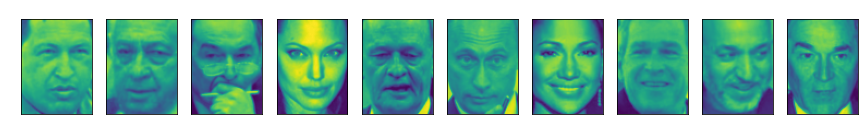

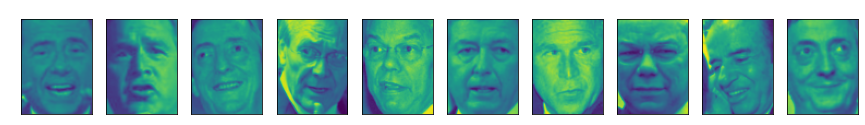

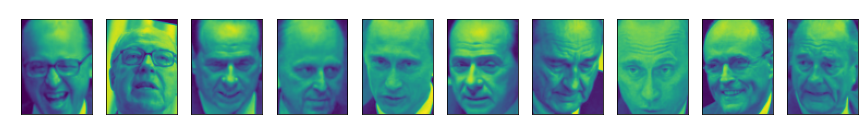

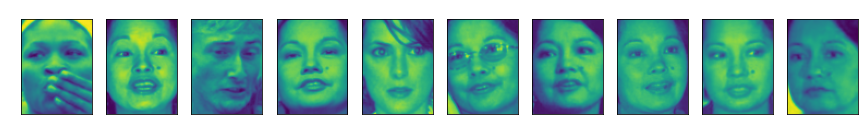

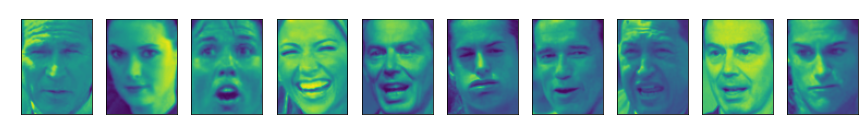

In [22]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw = {'xticks': (), 'yticks': ()}, figsize = (15, 8))
    axes[0].set_ylabel(np.sum(mask), color = "white")
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)
        ax.set_title(people["target_names"][label].split()[-1], fontdict = {'fontsize' : 9}, color = "white")
    

cluster sizes agglomerative clustering: [ 72 116  52 101 189 121  44   2 155  24  34  30  29  22   6  71  54 131
  41  53  20  96  30  36  12  61  54   8 182  19   7  17  50   5  22  22
  35  11  27   2]


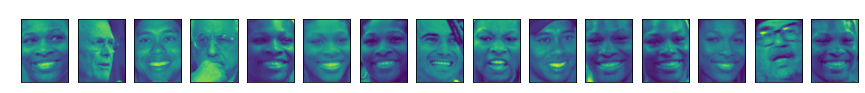

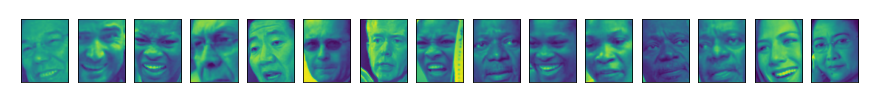

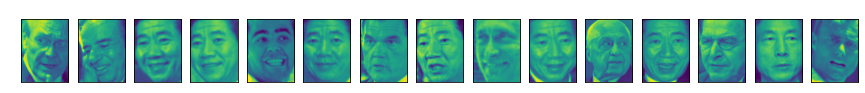

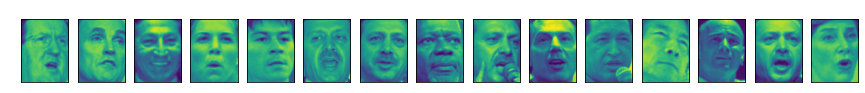

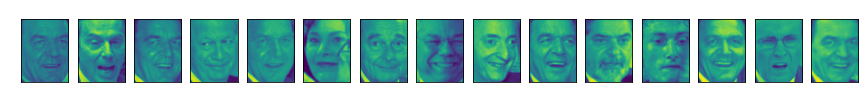

In [23]:
agglomerative = AgglomerativeClustering(n_clusters = 40)

labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw = {'xticks': (), 'yticks': ()}, figsize = (15, 8))
    
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size), color = "white")
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)
        ax.set_title(people["target_names"][label].split()[-1], fontdict = {'fontsize': 9}, color = "white")
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)